# 8. 신경망, 딥러닝의 응용(필기체 숫자 인식)

## 8.1 MNIST 데이터베이스

In [10]:
# MNIST 필기체 숫자 데이터셋 사용
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test,) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


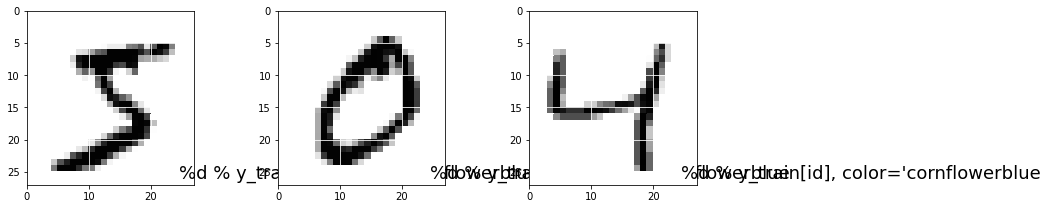

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

for id in range(3):
  plt.subplot(1,3, id+1)
  img = x_train[id, :, :]
  plt.pcolor(255 - img)
  plt.text(24.5, 26, "%d % y_train[id], color='cornflowerblue", fontsize=18)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.grid('on', color='white')

plt.show()

## 8.2 2층 피드 포워드 네트워크 모델[링크 텍스트](https://)

In [14]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  #784x28x28의 배열을 60000x784의 배열로 변환
x_train = x_train.astype('float32') # int형을 float형으로 변환
x_train = x_train / 255 

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) # ytrain 요소는 0-9정수
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes) # xtrain 요소는 0-9정수

In [16]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential() 
model.add( Dense(16, input_dim=784, activation='sigmoid') ) # 784차원 입력을 갖는 16개의 중간층
model.add( Dense(10, activation='softmax') ) # 10개의 출력층 정의
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy']) # Adam으로 설정

In [17]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1,
                    validation_data=(x_test, y_test)) # '확률적 경사 하강법' 사용. 1회 갱신에 사용하는 데이터 크기는 배치크기로 정의
                    # batch_size =1000 1000개의 데이터셋에서 기울기가 계산도니 매개 변수가 갱신
                    # 60회의 매개 변수 갱신 진행, 이를 1epoch. 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 3s 24ms/step - loss: 1.9652 - accuracy: 0.5352 - val_loss: 1.6588 - val_accuracy: 0.7067
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 1.4762 - accuracy: 0.7511 - val_loss: 1.2999 - val_accuracy: 0.8000
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 1.1842 - accuracy: 0.8138 - val_loss: 1.0617 - val_accuracy: 0.8364
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.9827 - accuracy: 0.8419 - val_loss: 0.8927 - val_accuracy: 0.8547
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.8384 - accuracy: 0.8584 - val_loss: 0.7699 - val_accuracy: 0.8674
Epoch 6/10
60/60 [==============================] - 1s 9ms/step - loss: 0.7329 - accuracy: 0.8691 - val_loss: 0.6797 - val_accuracy: 0.8752
Epoch 7/10
60/60 [==============================] - 1s 8ms/step - loss: 0.6536 - accuracy: 0.8775 - val_loss: 0.6116 - val_accuracy: 0.8825
Epoch 8/10
60/60 [=

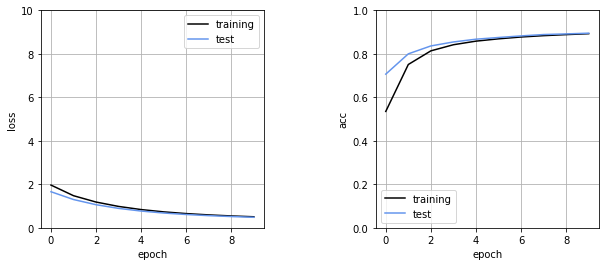

In [18]:
# 오버 피팅이 일어나지 않았는지 확인 위해, 테스트 데이터 오차의 시간 변화 플롯
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

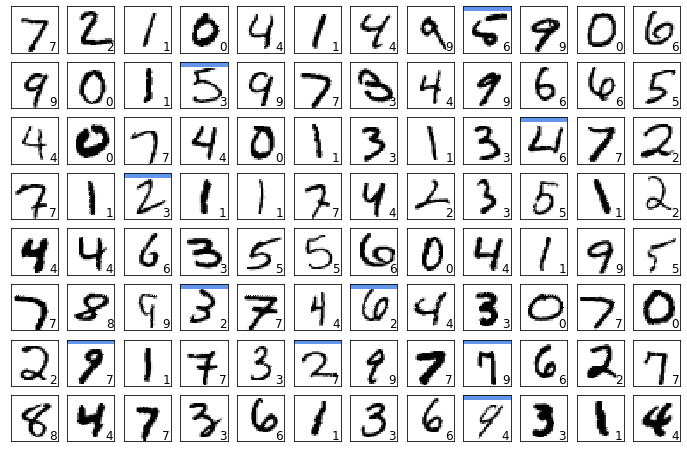

In [19]:
# 실제 테스트 데이터 입력시 모델 출력
def show_prediction():
  n_show = 96
  y = model.predict(x_test) # x_test 전체에 대한 모델의 출력 y 얻음.
  plt.figure(2, figsize=(12, 8))
  plt.gray()

  for i in range(n_show):
    plt.subplot(8, 12, i + 1)
    x = x_test[i, :]
    x = x.reshape(28, 28)
    plt.pcolor(1 - x)
    wk = y[i, :]
    prediction = np.argmax(wk)
    plt.text(22, 25.5, "%d" % prediction, fontsize=12)
    if prediction != np.argmax(y_test[i, :]):
      plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
  
# 메인 
show_prediction()
plt.show()

## 8.3 ReLU 활성화 함수

In [21]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) #(A)
model.add(Dense(10, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 13ms/step - loss: 1.5452 - accuracy: 0.5311 - val_loss: 0.8740 - val_accuracy: 0.8117
Epoch 2/10
60/60 [==============================] - 0s 8ms/step - loss: 0.6595 - accuracy: 0.8438 - val_loss: 0.4941 - val_accuracy: 0.8786
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 0.4519 - accuracy: 0.8823 - val_loss: 0.3910 - val_accuracy: 0.8974
Epoch 4/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.8963 - val_loss: 0.3470 - val_accuracy: 0.9061
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3435 - accuracy: 0.9045 - val_loss: 0.3202 - val_accuracy: 0.9106
Epoch 6/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3203 - accuracy: 0.9104 - val_loss: 0.3040 - val_accuracy: 0.9143
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3045 - accuracy: 0.9144 - val_loss: 0.2942 - val_accuracy: 0.9165
Epoch 8/10
60/60 [=

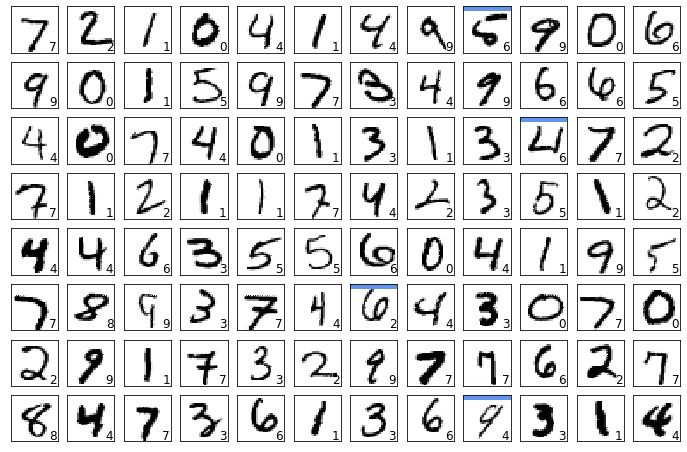

In [22]:
# 테스트 데이터 인식의 예 확인
show_prediction()
plt.show()

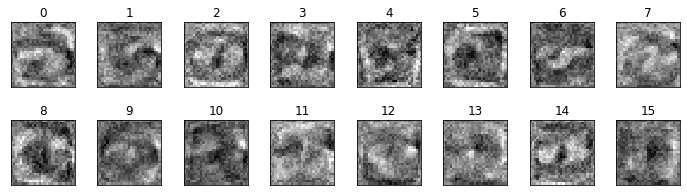

In [23]:
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0] # 네트워크 모델의 중간층 가중치 매개 변수 얻음
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
  plt.subplot(2, 8, i + 1)
  w1 = w[:, i]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()